<a href="https://colab.research.google.com/github/Md-Aziz-Developer/tensorflow-learning/blob/main/01_neural_network_regression_with_tensorflow_video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression with Neural Networks in TensorFlow

There are many definitions for a regression problem but in our case, we're going to simplify it: predicting a numerical variable bases on some other combination of variables, even shorter... predictiing a number.


In [2]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.17.1


## Creating data to view and fit

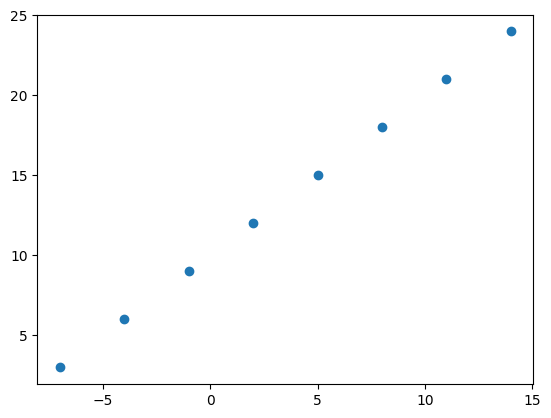

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X=np.array([-7.0, -4.0,-1.0,2.0,5.0,8.0,11.0,14.0])

# Create labels
y=np.array([3.0,6.0,9.0,12.0,15.0,18.0,21.0,24.0])

# Visualize it
plt.scatter(X,y);

In [4]:
y==X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and output shape

In [5]:
# Create a demo tensor for our housing price prediction problem
housing_info=tf.constant(['bedroom','bathroom','garage'])
housing_price=tf.constant([939700])
housing_info, housing_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [6]:
X[0],y[0]

(-7.0, 3.0)

In [7]:
X[1], y[1]

(-4.0, 6.0)

In [8]:
input_shape=X.shape
output_shape=y.shape
input_shape, output_shape

((8,), (8,))

In [9]:
X[0].shape, y[0].shape

((), ())

In [10]:
X[0].ndim

0

In [11]:
X[0], y[0]

(-7.0, 3.0)

In [12]:
# Turn our NUmPy arrays into tensors
X=tf.cast(tf.constant(X),dtype=tf.float32)
y=tf.cast(tf.constant(y),dtype=tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [13]:
input_shape=X[0].shape
output_shape=y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

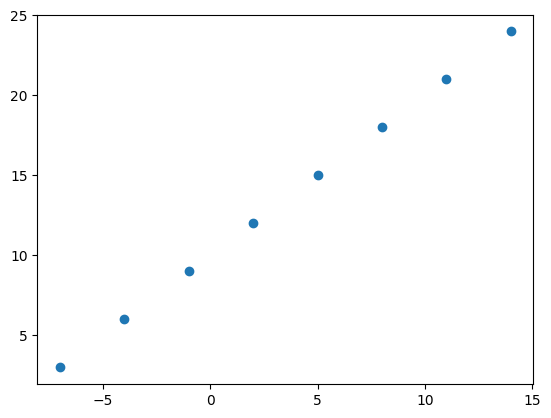

In [14]:
plt.scatter(X,y)

## Steps in modeling with tensorFlow

1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model.
2. **Compiling a model** - define the loss function (in pther words, the function which tells our model how erong it is) and the optimizer (tell our model how to improve the patterns its learning) an evaluation metrics (what we can use to interpret the performance of our model).
3. **Fitting a model** - letting the model try to find patterns between X & y (features and labels).

In [15]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # sgd is short form of stochasitc gradient descent
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X,axis=-1), y, epochs=20)

Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 632ms/step - loss: 16.9402 - mae: 16.9402
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 16.6589 - mae: 16.6589
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 16.3777 - mae: 16.3777
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 16.0964 - mae: 16.0964
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 15.8152 - mae: 15.8152
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 15.5339 - mae: 15.5339
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 15.2527 - mae: 15.2527
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 14.9714 - mae: 14.9714
Epoch 9/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 14.7635 - mae: 14.7635
Epoch 10/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 14.6310 - mae: 14.6310
Epoch 11/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 14.4985 - mae: 14.4985
Epoch 12/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 14.3660 - mae: 14.3660
Epoch 13/20
1/1 ━━━━━━━━━━━━━━━━━━━━

In [16]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [17]:
# Try and make a prediction using our model
y_preds=model.predict(np.array([17.0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


In [18]:
y_preds

array([[0.8917466]], dtype=float32)

## Improving the model

We can improve our model, by altering the steps we took to create a model.

1. **Creating a model** - here we might add more layers, increase the number of hidden units (all called neurons) within each of the hidden layers, change the activation function of each layer.

2. **Compiling a model** - here we might change the optimization function or perhaps the **learning rate** of  the optimization function.

3. **Fitting a model** - here we might fit a model for more **epochs** (leave it traning for longer) or on more data (give the model example to learn from).

In [19]:
# Let's rebuild our model

# 1. Create the model
model=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model (this time we'll train for longer)
model.fit(tf.expand_dims(X,axis=-1), y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 561ms/step - loss: 10.3137 - mae: 10.3137
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 10.1812 - mae: 10.1812
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 10.0487 - mae: 10.0487
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 9.9162 - mae: 9.9162
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 9.7837 - mae: 9.7837
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 9.6512 - mae: 9.6512
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 9.5187 - mae: 9.5187
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 9.3862 - mae: 9.3862
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 9.2537 - mae: 9.2537
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 9.1212 - mae: 9.1212
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 8.9887 - mae: 8.9887
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 8.8562 - mae: 8.8562
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3

In [20]:
# Remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [21]:
# Let's see if our model's prediction has improved
model.predict(np.array([17.0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


array([[29.968903]], dtype=float32)

In [22]:
# Let's rebuild our model again (this time we added an extra hidden layer with 100 hidden units)

# 1. Create a model
model=tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

# 2. Complie the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X,axis=-1),y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 758ms/step - loss: 13.8884 - mae: 13.8884
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 13.3345 - mae: 13.3345
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 12.7855 - mae: 12.7855
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 12.2404 - mae: 12.2404
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 11.7051 - mae: 11.7051
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 11.1636 - mae: 11.1636
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 10.6051 - mae: 10.6051
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 10.0278 - mae: 10.0278
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - loss: 9.4211 - mae: 9.4211
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 8.7878 - mae: 8.7878
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 8.1458 - mae: 8.1458
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 7.4818 - mae: 7.4818
Epoch 13/100
1/1 ━━━━━━━━━━━━━━

In [23]:
# Let's see if our model's prediction has improved after adding hidden layer
model.predict(np.array([17.0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


array([[31.110636]], dtype=float32)

In [24]:
# Let's rebuild our model again

# 1. Create a model
model=tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None), # Decrease the hidden layer unit to 50 and activation to default
    tf.keras.layers.Dense(1)
])

# 2. Complie the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X,axis=-1),y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 597ms/step - loss: 13.7135 - mae: 13.7135
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 13.2062 - mae: 13.2062
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 12.6987 - mae: 12.6987
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 12.1884 - mae: 12.1884
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 11.6726 - mae: 11.6726
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 11.1487 - mae: 11.1487
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 10.6140 - mae: 10.6140
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 10.0657 - mae: 10.0657
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 9.5010 - mae: 9.5010
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 8.9169 - mae: 8.9169
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 8.3107 - mae: 8.3107
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 7.6790 - mae: 7.6790
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━

In [25]:
model.predict(np.array([17.0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


array([[31.704182]], dtype=float32)

In [26]:
# Let's rebuild our model again

# 1. Create a model
model=tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
])

# 2. Complie the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(), # change the optimizer to Adam
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X,axis=-1),y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 862ms/step - loss: 13.0844 - mae: 13.0844
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 13.0138 - mae: 13.0138
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 12.9433 - mae: 12.9433
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 12.8728 - mae: 12.8728
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 12.8024 - mae: 12.8024
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 12.7320 - mae: 12.7320
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 12.6616 - mae: 12.6616
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 12.5912 - mae: 12.5912
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 12.5208 - mae: 12.5208
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 12.4504 - mae: 12.4504
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 12.3801 - mae: 12.3801
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 12.3097 - mae: 12.3097
Epoch 13/100
1/1 ━━━━━━━

In [27]:
model.predict(np.array([17.0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


array([[31.892752]], dtype=float32)

In [28]:
# Let's rebuild our model again

# 1. Create a model
model=tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
])

# 2. Complie the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), # Add learning rate to 0.01
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X,axis=-1),y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 909ms/step - loss: 12.2411 - mae: 12.2411
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 11.5379 - mae: 11.5379
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 10.8213 - mae: 10.8213
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 10.0899 - mae: 10.0899
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 9.3424 - mae: 9.3424
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 8.5767 - mae: 8.5767
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 7.7904 - mae: 7.7904
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 6.9816 - mae: 6.9816
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 6.9041 - mae: 6.9041
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 7.2430 - mae: 7.2430
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 7.4502 - mae: 7.4502
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 7.6469 - mae: 7.6469
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s

In [29]:
model.predict(np.array([17.0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


array([[26.14724]], dtype=float32)

In [30]:
model.predict(np.array([21.0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


array([[29.911535]], dtype=float32)

## Evaluating a model

In Practice, a typical workflow you'll go through when building neural networks is :

```
Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it ...
```

when it comes to evaluation... there a re 3 words you should memorize:

> "Visualize, visualize, visualize"

It's a good idea to visualize:

* The data-what data are we working with? what does it look like?
* The model itself - what does our model look like?
* The training of a model - how does a model perform while it learns?
* The predictions of the model - how do the predictions of a model line up against the ground truth(the original labels)?

In [31]:
# Make a bigger dataset
X= tf.range(-100, 100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [32]:
# Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

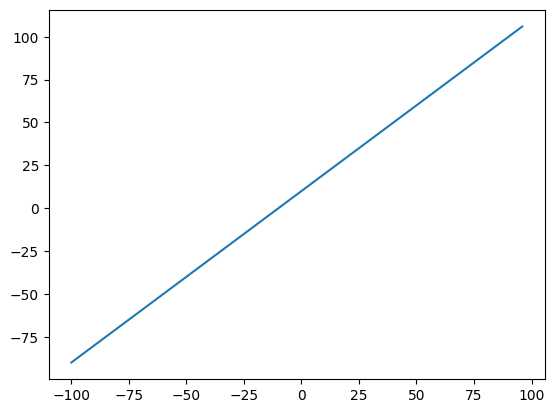

In [33]:
# Visualize the data
plt.plot(X,y)

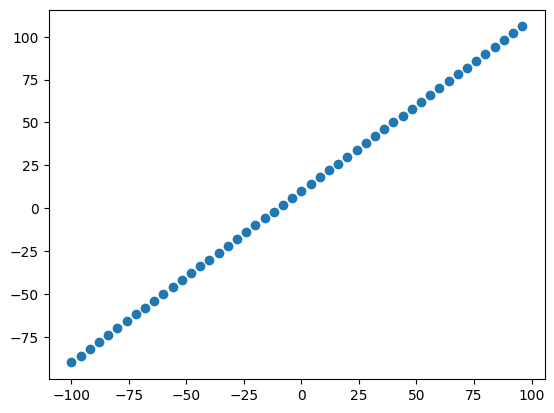

In [34]:
plt.scatter(X,y)

### The 3 sets...

* **Traning set** - the model learns from this data, whihc is typically 70-80% of the total data you have available.
* **Validation set** - the model gets tuned on this data, which is typically 10-15% of the data available.
* **Test set** - the model gets evaluated on this data to test what is model has learned, this set is typically 10-15% of the total data available.

In [35]:
# Check the length of how many samples we have
len(X)

50

In [36]:
# Split the data into train and test sets
X_train=X[:40] # first 40 are training samples (80% of the data)
y_train=y[:40]

X_test=X[40:] # last 10 are testing samples (20% of the data)
y_test=y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### Visualize the data
Now we've got our data in training and test sets.. let's visualize it again!

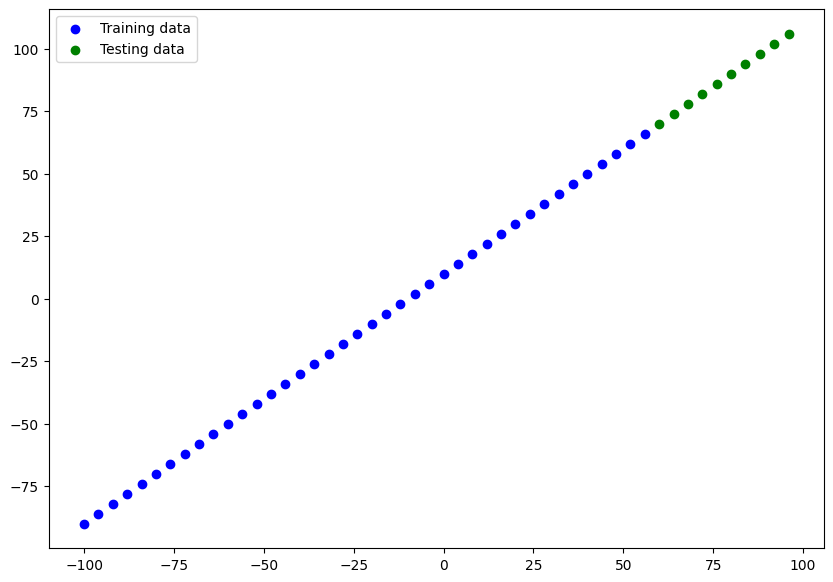

In [37]:
plt.figure(figsize=(10,7))
# Plot traning data in blue
plt.scatter(X_train, y_train, c="b", label="Training data")
# Plot test data ub green
plt.scatter(X_test, y_test,c="g", label="Testing data")
# Show a legend
plt.legend();

In [38]:
# Let's have a look how to build a neural network for our data

# 1. Create a model
model=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
# model.fit(tf.expand_dims(X_train,axis=-1),y_train, epochs=100)

In [39]:
# Visualizing the model
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [40]:
# Let's create a model which builds automatically by defining the input_shape arguments
tf.random.set_seed(42)

# 1. Create a model (same as above)
model=tf.keras.Sequential([
    tf.keras.layers.Dense(1,input_shape=[1])
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
# model.fit(tf.expand_dims(X_train, axis=-1),y, epochs=100)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [41]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                     │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

* Total params - total number of parameters in the model.
* Trainable parameters - these are the parameters (patterns) the model can update as it trains.
* Non-trainable params - these parameters aren't update during training (this is typical when you bring in already learn patterns or parameters from other models during **transfer learning**).

**Resources:** For more in-depth overview of the trainable parameters within the layer, check out MIT's introduction to deep learning video. https://www.youtube.com/watch?v=ErnWZxJovaM&list=PLtBw6njQRU-rwp5__7C0oIVt26ZgjG9NI&index=2

**Exercise:** Try playing with the number of hidden units in the dense layer, see how that effects the number of parameters (total and trainable) by calling `model.summary()`.

In [42]:
# Let's fit our model to the traning data
model.fit(tf.expand_dims(X_train,axis=-1),y_train, epochs=100,verbose=1)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 45.1873 - mae: 45.1873 
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 13.2901 - mae: 13.2901 
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 8.6042 - mae: 8.6042
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 8.3802 - mae: 8.3802
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9.1073 - mae: 9.1073 
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 8.1947 - mae: 8.1947 
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 8.8464 - mae: 8.8464
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 7.8007 - mae: 7.8007
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 10.7597 - mae: 10.7597
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 7.6072 - mae: 7.6072 
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 11.9321 - mae: 11.9321
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 8.1127 - mae: 8.1127 
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s

In [43]:
# Get a summary of our model
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                     │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4 (20.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

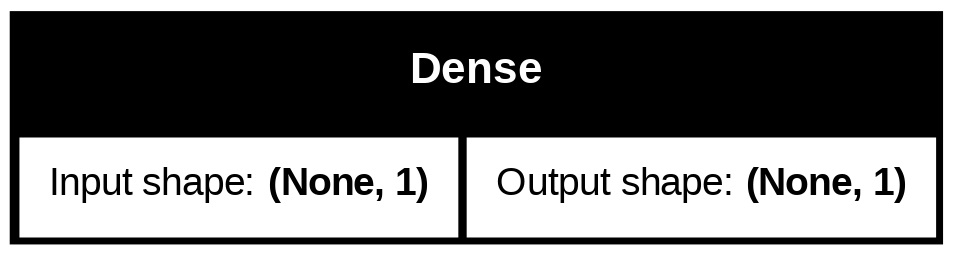

In [44]:
from tensorflow.keras.utils import plot_model
plot_model(model=model,show_shapes=True)

In [45]:
# Let's create a model which builds automatically by defining the input_shape arguments
tf.random.set_seed(42)

# 1. Create a model (same as above)
model=tf.keras.Sequential([
    tf.keras.layers.Dense(100,input_shape=[1],name="input_layer"),
    tf.keras.layers.Dense(1,name="output_layer")
],name="model_1")

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])


In [46]:
model.summary()

Model: "model_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (Dense)                  │ (None, 100)                 │             200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 301 (1.18 KB)

 Trainable params: 301 (1.18 KB)

 Non-trainable params: 0 (0.00 B)

In [47]:
# Fit the model
model.fit(tf.expand_dims(X_train,axis=-1),y_train,epochs=100,verbose=1)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 44.3108 - mae: 44.3108 
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 33.1155 - mae: 33.1155
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 27.7635 - mae: 27.7635 
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 16.0447 - mae: 16.0447 
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 18.8586 - mae: 18.8586 
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 12.2653 - mae: 12.2653 
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 18.5866 - mae: 18.5866 
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 13.7906 - mae: 13.7906 
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 15.1662 - mae: 15.1662 
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 11.0594 - mae: 11.0594
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 14.8807 - mae: 14.8807 
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 10.9483 - mae: 10.9483
Epoch 13/100
2/2 ━━━━━━━━━

In [48]:
# Get a summary of our model
model.summary()

Model: "model_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (Dense)                  │ (None, 100)                 │             200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 303 (1.19 KB)

 Trainable params: 301 (1.18 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

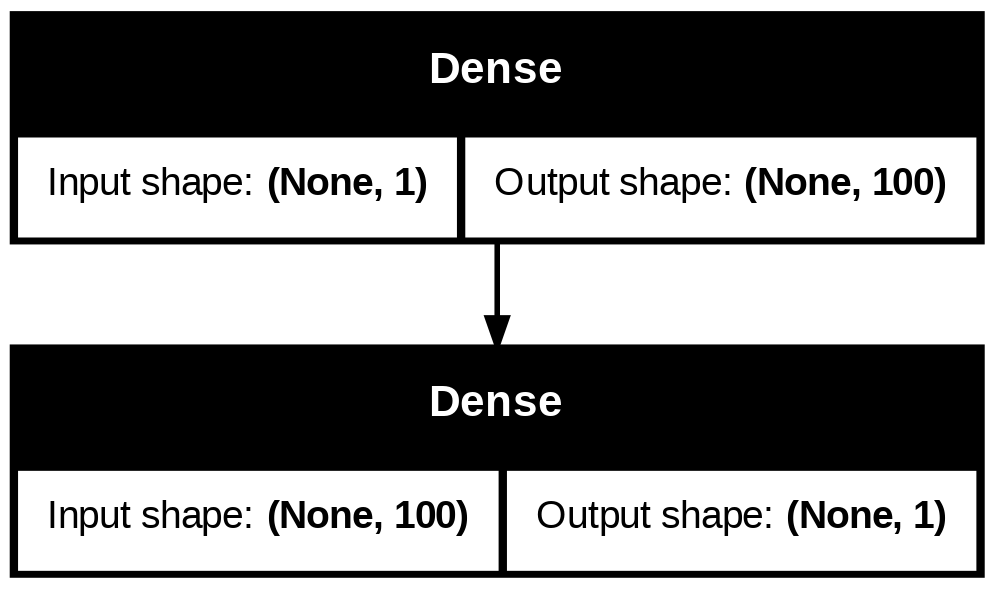

In [49]:
plot_model(model=model,show_shapes=True)

### Visualizing our model's predictions

To visualize predictions, it's a good idea to plot them against the groud truth labels.

Often you'll see this in the form of `y_test` or `y_true` versus `y_pred` (ground truth versus your model predictions).

In [50]:
# Make some predictions
y_pred=model.predict(X_test)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


array([[37.672012],
       [40.0771  ],
       [42.482193],
       [44.887283],
       [47.292374],
       [49.697456],
       [52.102547],
       [54.507645],
       [56.912735],
       [59.31782 ]], dtype=float32)

In [51]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

**Note:** If you feel like you're going to reuse some kind of funtinality in the future, it's a good idea to turn it into a function.

In [52]:
# Let's create plotting function
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
  """
  Plots traning data, test data and compares predictions to ground truth labels.
  """
  plt.figure(figsize=(10,7))
  # Plot training data in blue
  plt.scatter(train_data,train_labels,c="b",label="Training data")
  # Plot testing data in green
  plt.scatter(test_data,test_labels, c="g", label="Testing data")
  # Plot model's predictions in red
  plt.scatter(test_data,predictions, c="r",label="Predictions")
  # Show the legend
  plt.legend();

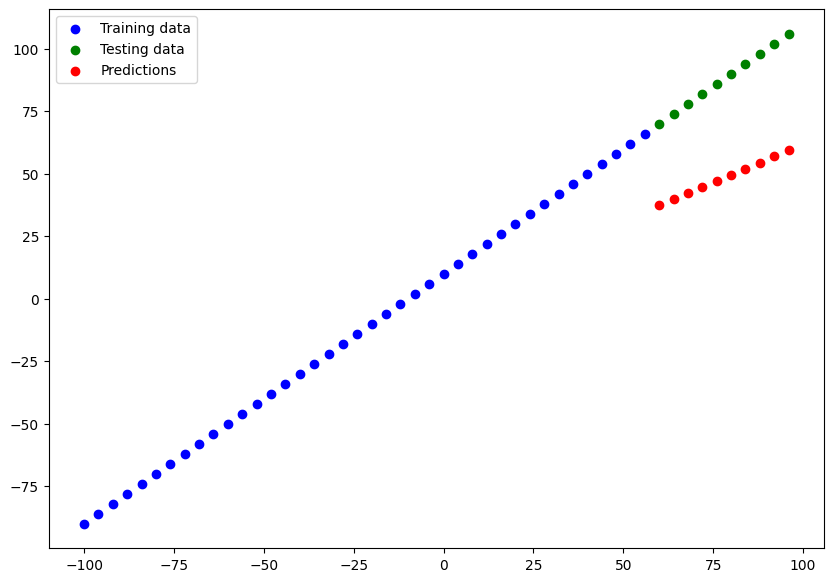

In [53]:
plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred)

In [54]:
# Let's refine our model by tunning the hyperparameters

# Create another model
new_model=tf.keras.Sequential([
    tf.keras.layers.Dense(100,input_shape=[1]),
    tf.keras.layers.Dense(1)
])

# Compile the model
new_model.compile(loss=tf.keras.losses.mae,
                  optimizer=tf.keras.optimizers.Adam(learning_rate=(0.01)),
                  metrics=["mae"]
                  )


In [55]:
# Get the model summary
new_model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 100)                 │             200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 301 (1.18 KB)

 Trainable params: 301 (1.18 KB)

 Non-trainable params: 0 (0.00 B)

In [56]:
# Fit the model
new_model.fit(tf.expand_dims(X_train,axis=-1),y_train,epochs=100,verbose=1)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 42.9105 - mae: 42.9105
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 21.8804 - mae: 21.8804 
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 9.2585 - mae: 9.2585 
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 14.3710 - mae: 14.3710 
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 14.8614 - mae: 14.8614
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 11.8122 - mae: 11.8122
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 7.9396 - mae: 7.9396 
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 10.2904 - mae: 10.2904 
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 10.8542 - mae: 10.8542
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 7.8240 - mae: 7.8240 
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 7.9767 - mae: 7.9767 
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 9.0288 - mae: 9.0288
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━

In [57]:
# Get the predictions of our model
y_pred=new_model.predict(X_test)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


array([[ 72.48831 ],
       [ 76.65848 ],
       [ 80.828636],
       [ 84.998795],
       [ 89.16895 ],
       [ 93.33912 ],
       [ 97.50928 ],
       [101.679436],
       [105.84959 ],
       [110.019745]], dtype=float32)

In [58]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

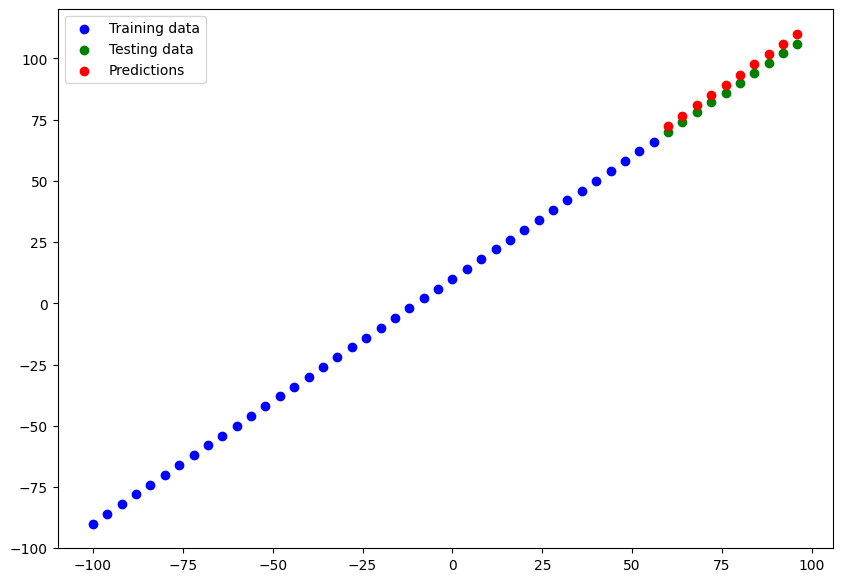

In [59]:
# Visualize the predictions again
plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred)

In [60]:
## Almost predictions match with our true value let's tune more by adding more hidden layer and change learning rate by 0.02 and epochs to 150

# Create another model
new_model=tf.keras.Sequential([
    tf.keras.layers.Dense(100,input_shape=[1]),
    tf.keras.layers.Dense(100), # Added extra 100 unit hidden layer
    tf.keras.layers.Dense(1)
])

# Compile the model
new_model.compile(loss=tf.keras.losses.mae,
                  optimizer=tf.keras.optimizers.Adam(learning_rate=(0.02)),
                  metrics=["mae"]
                  )

In [61]:
new_model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                     │ (None, 100)                 │             200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,401 (40.63 KB)

 Trainable params: 10,401 (40.63 KB)

 Non-trainable params: 0 (0.00 B)

In [62]:
new_model.fit(tf.expand_dims(X_train,axis=-1),y_train, epochs=150, verbose=1)

Epoch 1/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 49.8418 - mae: 49.8418
Epoch 2/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 55.8758 - mae: 55.8758 
Epoch 3/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 37.8086 - mae: 37.8086 
Epoch 4/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 37.3951 - mae: 37.3951
Epoch 5/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 13.1382 - mae: 13.1382 
Epoch 6/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 16.9548 - mae: 16.9548
Epoch 7/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 9.6829 - mae: 9.6829
Epoch 8/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 15.1476 - mae: 15.1476 
Epoch 9/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 8.3011 - mae: 8.3011
Epoch 10/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 13.4566 - mae: 13.4566
Epoch 11/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 6.7182 - mae: 6.7182 
Epoch 12/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 11.5640 - mae: 11.5640
Epoch 13/150
2/2 ━━━━━━━━━━━━━

In [63]:
y_pred=new_model.predict(X_test)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


array([[ 68.45664 ],
       [ 72.375305],
       [ 76.29394 ],
       [ 80.21261 ],
       [ 84.131256],
       [ 88.04993 ],
       [ 91.96858 ],
       [ 95.88722 ],
       [ 99.80589 ],
       [103.72454 ]], dtype=float32)

In [64]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

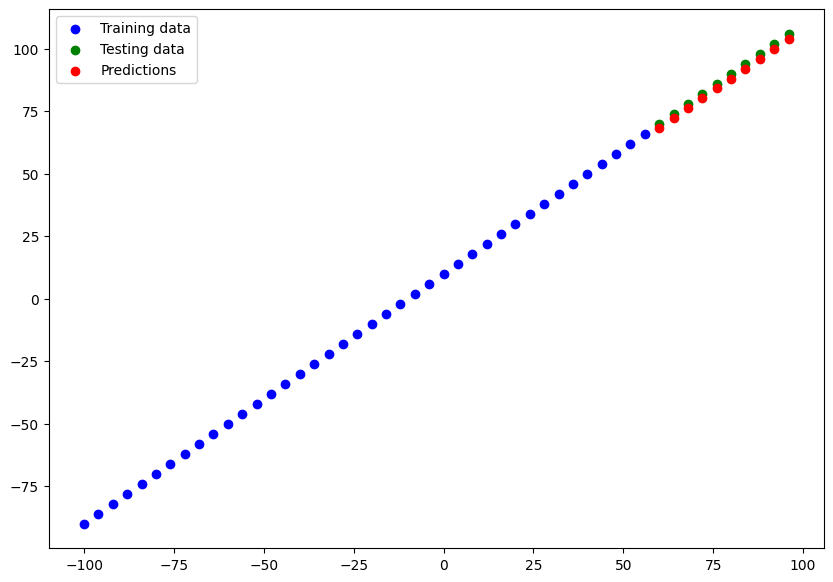

In [65]:
# Visualize the predictions again
plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred)

In [66]:
## After more tunning the prediction not improving instead of it get worse then previous one so let's stick on previous one

# Create another model
new_model2=tf.keras.Sequential([
    tf.keras.layers.Dense(100,input_shape=[1]),
    tf.keras.layers.Dense(1)
])

# Compile the model
new_model2.compile(loss=tf.keras.losses.mae,
                  optimizer=tf.keras.optimizers.Adam(learning_rate=(0.01)),
                  metrics=["mae"]
                  )

# Fit the model
new_model2.fit(tf.expand_dims(X_train,axis=-1),y_train, epochs=100, verbose=1)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 44.6101 - mae: 44.6101  
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 24.1403 - mae: 24.1403 
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8.3969 - mae: 8.3969 
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 15.6524 - mae: 15.6524
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 16.8494 - mae: 16.8494 
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 12.8927 - mae: 12.8927
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 8.7439 - mae: 8.7439 
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 9.3064 - mae: 9.3064 
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 11.0037 - mae: 11.0037
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8.7208 - mae: 8.7208 
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7.0050 - mae: 7.0050 
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8.2206 - mae: 8.2206 
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━

In [67]:
y_pred=new_model2.predict(X_test)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


array([[ 68.840065],
       [ 72.763664],
       [ 76.687256],
       [ 80.61086 ],
       [ 84.53445 ],
       [ 88.458046],
       [ 92.38164 ],
       [ 96.30525 ],
       [100.22886 ],
       [104.15244 ]], dtype=float32)

In [68]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

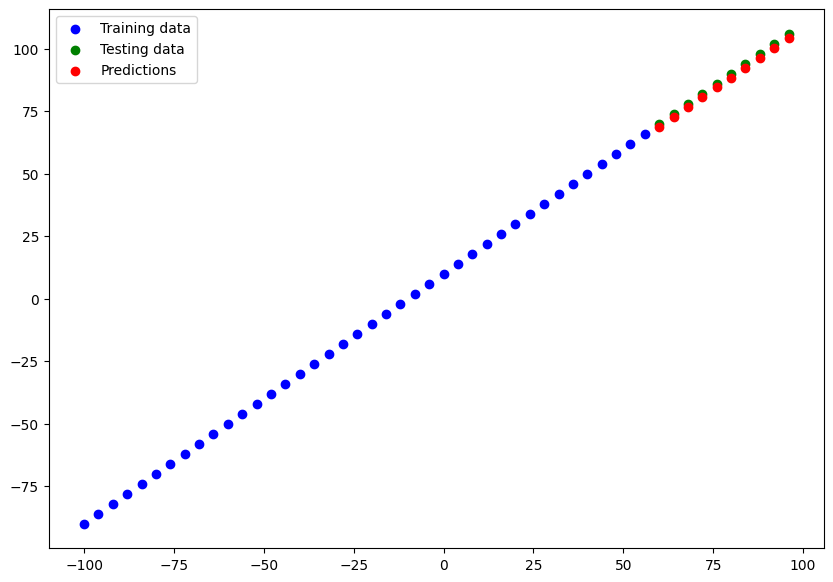

In [69]:
# Visualize the predictions again
plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred)

### Evaluating our model's predictions with regression evaluation metrics

Depending on the problem you're working on, there will be diffreenr evaluation metrics to evaluate your model's performance.

Since we're working on a regression, two of the main metrics:
* MAE - mean absolute error, "on average, how wrong is each of my model's predictions"
* MSE - mean square error, "square the average errors"

In [70]:
# Evaluate the model on the test set
new_model2.evaluate(X_test,y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step - loss: 1.5037 - mae: 1.5037


[1.503746747970581, 1.503746747970581]

In [71]:
y_pred

array([[ 68.840065],
       [ 72.763664],
       [ 76.687256],
       [ 80.61086 ],
       [ 84.53445 ],
       [ 88.458046],
       [ 92.38164 ],
       [ 96.30525 ],
       [100.22886 ],
       [104.15244 ]], dtype=float32)

In [72]:
# Calculate the mean absolute error
mae=tf.metrics.mae(y_true=y_test,y_pred=tf.constant(y_pred))
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([1.159935 , 1.2363358, 1.3127441, 1.3891373, 1.4655533, 1.541954 ,
       1.6183624, 1.6947479, 1.771141 , 1.8475571], dtype=float32)>

In [73]:
tf.constant(y_pred)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 68.840065],
       [ 72.763664],
       [ 76.687256],
       [ 80.61086 ],
       [ 84.53445 ],
       [ 88.458046],
       [ 92.38164 ],
       [ 96.30525 ],
       [100.22886 ],
       [104.15244 ]], dtype=float32)>

In [74]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [75]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 68.840065,  72.763664,  76.687256,  80.61086 ,  84.53445 ,
        88.458046,  92.38164 ,  96.30525 , 100.22886 , 104.15244 ],
      dtype=float32)>

In [76]:
# Calculate the mean absolute error
mae=tf.metrics.mae(y_true=y_test,y_pred=tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=1.5037467>

In [77]:
# Calculate the mean square error
mse=tf.metrics.mse(y_true=y_test,y_pred=tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=2.3094118>

In [78]:
# Make some function to reuse MAE and MSE
def mae(y_true,y_pred):
  return tf.metrics.mae(y_true=y_true,y_pred=tf.squeeze(y_pred))

def mse(y_true,y_pred):
  return tf.metrics.mse(y_true=y_true,y_pred=tf.squeeze(y_pred))


### Running experiments to improve our model

```
Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it ...
```

1. Get more data - get more examples for your model to train on (more opportunities to learn patterns or relationships between features and labels).
2. Make your model larger (using a more complex model) - this might come in the form of more layers or more hidden units in each layer.
3. Train for longer - give you model more of a chance to find patterns in the data.

Let's do 3 modeling experiments:
1. `model_1` - same as the original model 1 layer, trained for 100 epochs.
2. `model_2` - 2 layers, trained for 100 epochs.
3. `model_3` - 2 layers, trained for 500 epochs.

**Build `model_1`**

In [79]:
X_train, y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)

In [80]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_1=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"]
                )

# 3. Fit the model
model_1.fit(tf.expand_dims(X_train,axis=-1),y_train,epochs=100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 107.5565 - mae: 107.5565 
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 72.3883 - mae: 72.3883
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 37.3704 - mae: 37.3704 
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8.2969 - mae: 8.2969 
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 8.9742 - mae: 8.9742 
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 8.0099 - mae: 8.0099 
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 9.6574 - mae: 9.6574 
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7.9921 - mae: 7.9921 
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 9.6457 - mae: 9.6457 
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7.9742 - mae: 7.9742 
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 9.6341 - mae: 9.6341
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 7.9564 - mae: 7.9564 
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


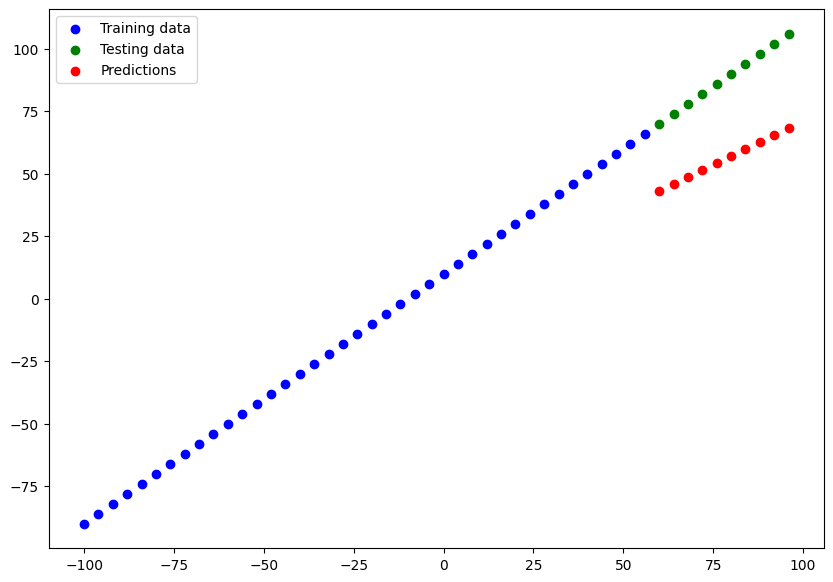

In [81]:
# Make and plot prediction for model_1
y_preds_1=model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [82]:
# Calculate model_1 evaluation mmetrics
mae_1=mae(y_test,y_preds_1)
mse_1=mse(y_test,y_preds_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=32.24949>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1052.1432>)

**Build `model_2`**
* 2 dense layers trained for 100 epochs

In [83]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model_2=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
])

# Compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# Fit the model
model_2.fit(tf.expand_dims(X_train,axis=-1),y_train,epochs=100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 42.8504 - mae: 42.8504 
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 32.2729 - mae: 32.2729 
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 28.0461 - mae: 28.0461 
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 16.5310 - mae: 16.5310 
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 19.3540 - mae: 19.3540 
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 12.9993 - mae: 12.9993 
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 18.3905 - mae: 18.3905 
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 13.6815 - mae: 13.6815 
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 15.0784 - mae: 15.0784 
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 11.0073 - mae: 11.0073
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 14.8219 - mae: 14.8219 
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 10.9076 - mae: 10.9076
Epoch 13/100
2/2 ━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


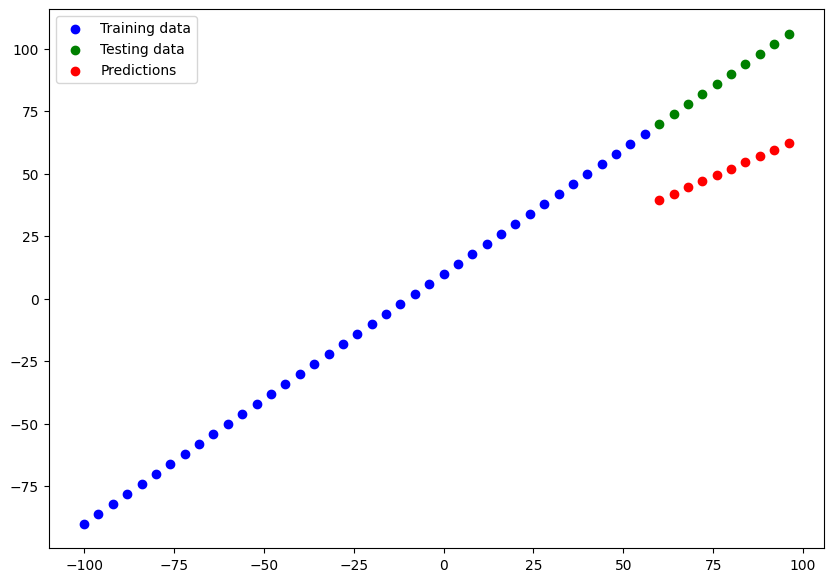

In [84]:
# Make and plot predictions for model_2
y_preds_2=model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [85]:
# Calculate model_2 evaluation mmetrics
mae_2=mae(y_test,y_preds_2)
mse_2=mse(y_test,y_preds_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=37.153675>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1398.3367>)

**Build `model_3`**

* 2 layers, trained for 500 epocs

In [86]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model
model_3=tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. Fit the model
model_3.fit(tf.expand_dims(X,axis=-1),y,epochs=500)

Epoch 1/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 52.5644 - mae: 52.5644 
Epoch 2/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 38.0587 - mae: 38.0587 
Epoch 3/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 30.7274 - mae: 30.7274 
Epoch 4/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 27.4069 - mae: 27.4069 
Epoch 5/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 9.9030 - mae: 9.9030 
Epoch 6/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 15.8063 - mae: 15.8063 
Epoch 7/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 24.1360 - mae: 24.1360 
Epoch 8/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 23.1160 - mae: 23.1160
Epoch 9/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 24.6059 - mae: 24.6059
Epoch 10/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 9.7720 - mae: 9.7720
Epoch 11/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 16.2373 - mae: 16.2373
Epoch 12/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 23.1463 - mae: 23.1463 
Epoch 13/500
2/2 ━━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


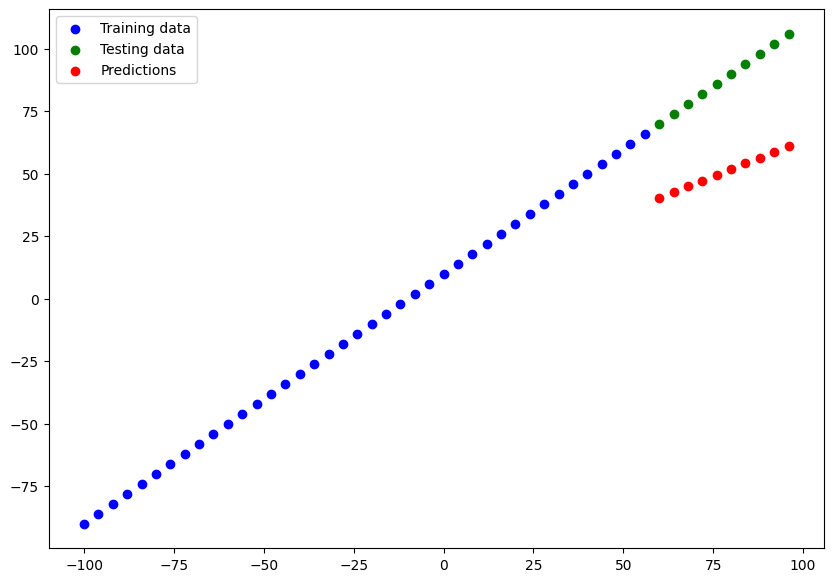

In [87]:
# Make and plot some predictions
y_preds_3=model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [88]:
# Calculate model_3 evaulation metrics
mae_3=mae(y_test,y_preds_3)
mse_3=mse(y_test,y_preds_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=37.284748>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1414.3945>)

**Note:** You want to start with small experiments(small models) and make sure they work and then increase their scale when necessary.

### Comparing the results of our experiments

We've run a few experiments, let's compare the results.

In [89]:
#Let's compare our model's results using a pandas DataFrame
import pandas as pd

model_results=[
    ["model_1",mae_1.numpy(),mse_1.numpy()],
    ["model_2",mae_2.numpy(),mse_2.numpy()],
    ["model_3",mae_3.numpy(),mse_3.numpy()]
]
all_results=pd.DataFrame(model_results,columns=["model","mae","mse"])
all_results

,model,mae,mse
0,model_1,32.249489,1052.143188
1,model_2,37.153675,1398.336670
2,model_3,37.284748,1414.394531


Looks like `model_1` performed the best

In [90]:
model_1.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_19 (Dense)                     │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4 (20.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [91]:
model_1

<Sequential name=sequential_11, built=True>

> **Note:** One of our main goals should be the minimize the time between your experiments. The more experiments you do, the more you'll figure out whiich don't work and in turn, get closer to figuring out what does work. Rememberthe machine learning prationer's motto: "experiment, experiment, experiment".

## Tracking our experiments

One really good habit is machine learning modelling is to track the results of your experiments.

And when doing so, it can be tedious if you're running lots of experiments.

Luckily, there are tools to help us!

**Resources:** As you build more models, you'll want to look into using:

* TensorBoard - a component of the TensorFlow library to help track modelling experiments (we'll see this one later).
* Weights & Biases - a tool for tracking all of kinds of machine learning experiments (plug straight into TensorBoard).



## Saving our models

Saving our models allows us to use them outside of Google Colab (or wherever they were trained) such as in a web application or in a mobile app.

There are two main formats we can save our model's too:
1. The SavedModel format
2. The HDF5 format

In [93]:
# Save a model using the SavedModel format
model_1.save("best_model_SavedModel_format.keras")

In [94]:
# Save model using the HDF5 format
model_1.save("best_model_HDF5_format.h5")

## Loading in a saved model

In [96]:
# Load in the SaveModel format model
loaded_SavedModel_format=tf.keras.models.load_model('best_model_SavedModel_format.keras')
loaded_SavedModel_format.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_19 (Dense)                     │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4 (20.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [98]:
# Compare model_1 predictions with SavedModel format model predictions
model_1_preds=model_1.predict(X_test)
loaded_model_preds=loaded_SavedModel_format.predict(X_test)
model_1_preds==loaded_model_preds

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [99]:
# Load in a model using the .h5 format model
load_hdf5_model=tf.keras.models.load_model('best_model_HDF5_format.h5')
load_hdf5_model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_19 (Dense)                     │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4 (20.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [102]:
# Compare the model_1 predictions with hdf5 format model predictions
model_1_preds_2=model_1.predict(X_test)
load_hdf5_model_preds=load_hdf5_model.predict(X_test)
model_1_preds==load_hdf5_model_preds

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])